In [1]:
import importlib
import pandas as pd
import json
import sys
import kad.kad_utils.kad_utils as kad_utils

kad_utils = importlib.reload(kad_utils)
import matplotlib.pyplot as plt

sys.path.insert(1, '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector')
print(sys.path)

kad_utils.customize_matplotlib()

['/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector/notebooks', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector/venv/lib/python3.8/site-packages', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector/venv/lib/python3.8/site-packages/IPython/extensions', '/home/maciek/.ipython']


In [2]:
SARIMA_KEY: str = "SARIMA"
AUTOENCODER_KEY: str = "autoencoder"
ACC_KEY: str = "accuracy"
PREC_KEY: str = "precision"
RECALL_KEY: str = "recall"

bar_colors = ["blue", "green"]

In [3]:
with open("eval.json") as f:
    eval_dict = json.load(f)

In [4]:
# def reorder_dictionary(p_eval_dict: dict):
#     reordered_eval_dict = {}
#
#     for k_file, v_file in p_eval_dict.items():
#         for k_algo, v_algo in v_file.items():
#             for k_metric, v_metric in v_algo.items():
#                 if k_metric not in reordered_eval_dict:
#                     reordered_eval_dict[k_metric] = {}
#                 if k_file not in reordered_eval_dict[k_metric]:
#                     reordered_eval_dict[k_metric][k_file] = {}
#                 reordered_eval_dict[k_metric][k_file][k_algo] = v_metric
#
#     return reordered_eval_dict
#

In [5]:
# figures = [ACC_KEY, PREC_KEY, RECALL_KEY]
# subplots = [221, 222, 223, 224]
#
# reordered_dictionary = reorder_dictionary(eval_dict)
#
# for k_metric, v_metric in reordered_dictionary.items():
#     fig = plt.figure()
#     fig.set_size_inches(20, 20)
#     i = 0
#     for k_file, v_file in v_metric.items():
#         ax = fig.add_subplot(subplots[i])
#         plt.bar(range(len(v_file)), list(v_file.values()), align="center", color=bar_colors)
#         plt.xticks(range(len(v_file)), list(v_file.keys()))
#         ax.set_title(k_file)
#         i += 1
#     fig.suptitle(k_metric, fontsize=50, color="white")
#     plt.show()
#     print("\n\n\n")

In [6]:
def reorder_dictionary(p_eval_dict: dict):
    reordered_eval_dict = {}

    for k_file, v_file in p_eval_dict.items():
        for k_algo, v_algo in v_file.items():
            for k_metric, v_metric in v_algo.items():
                if k_file not in reordered_eval_dict:
                    reordered_eval_dict[k_file] = {}
                if k_algo not in reordered_eval_dict[k_file]:
                    reordered_eval_dict[k_file][k_algo] = {}
                reordered_eval_dict[k_file][k_algo][k_metric] = v_metric

    return reordered_eval_dict

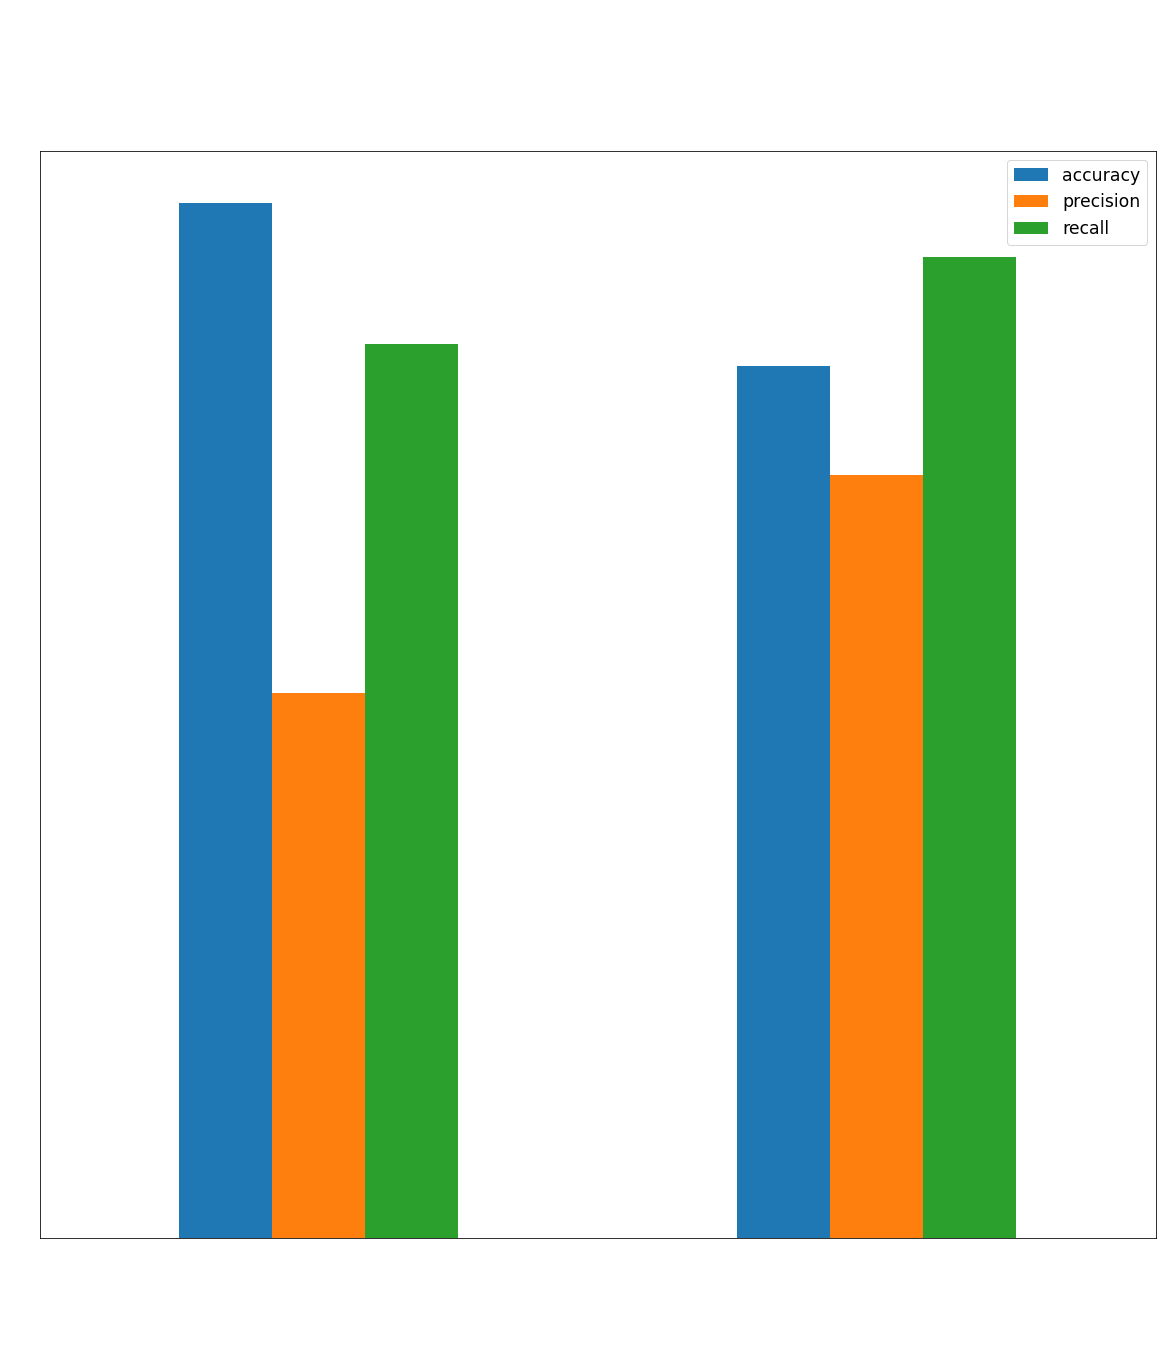

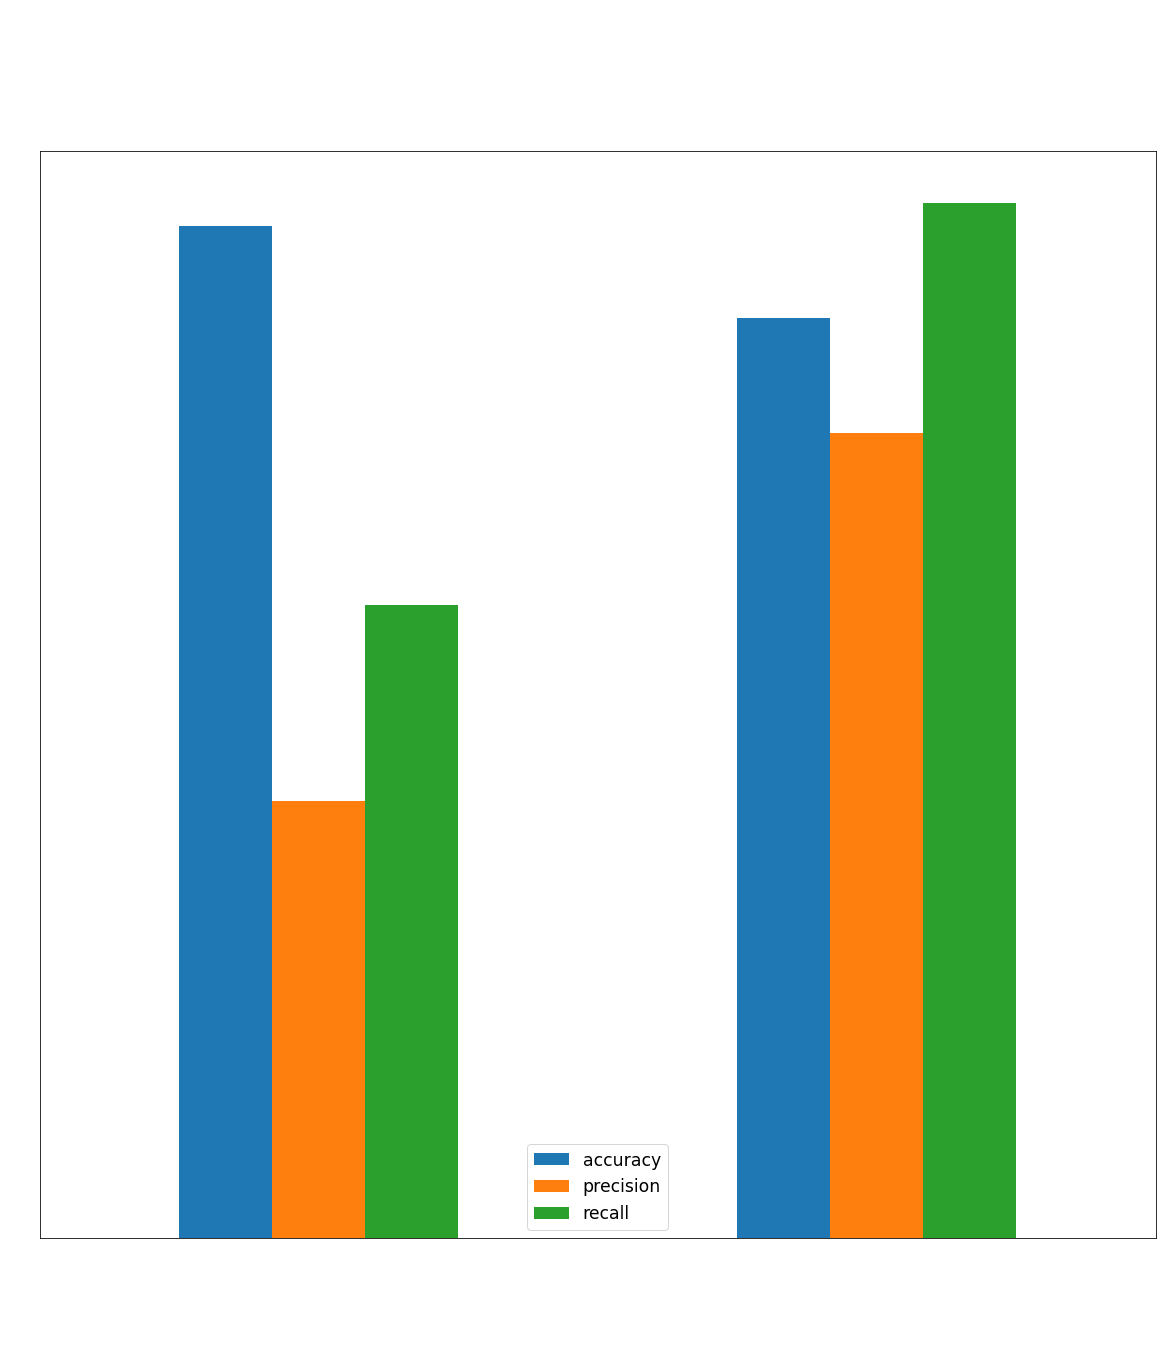

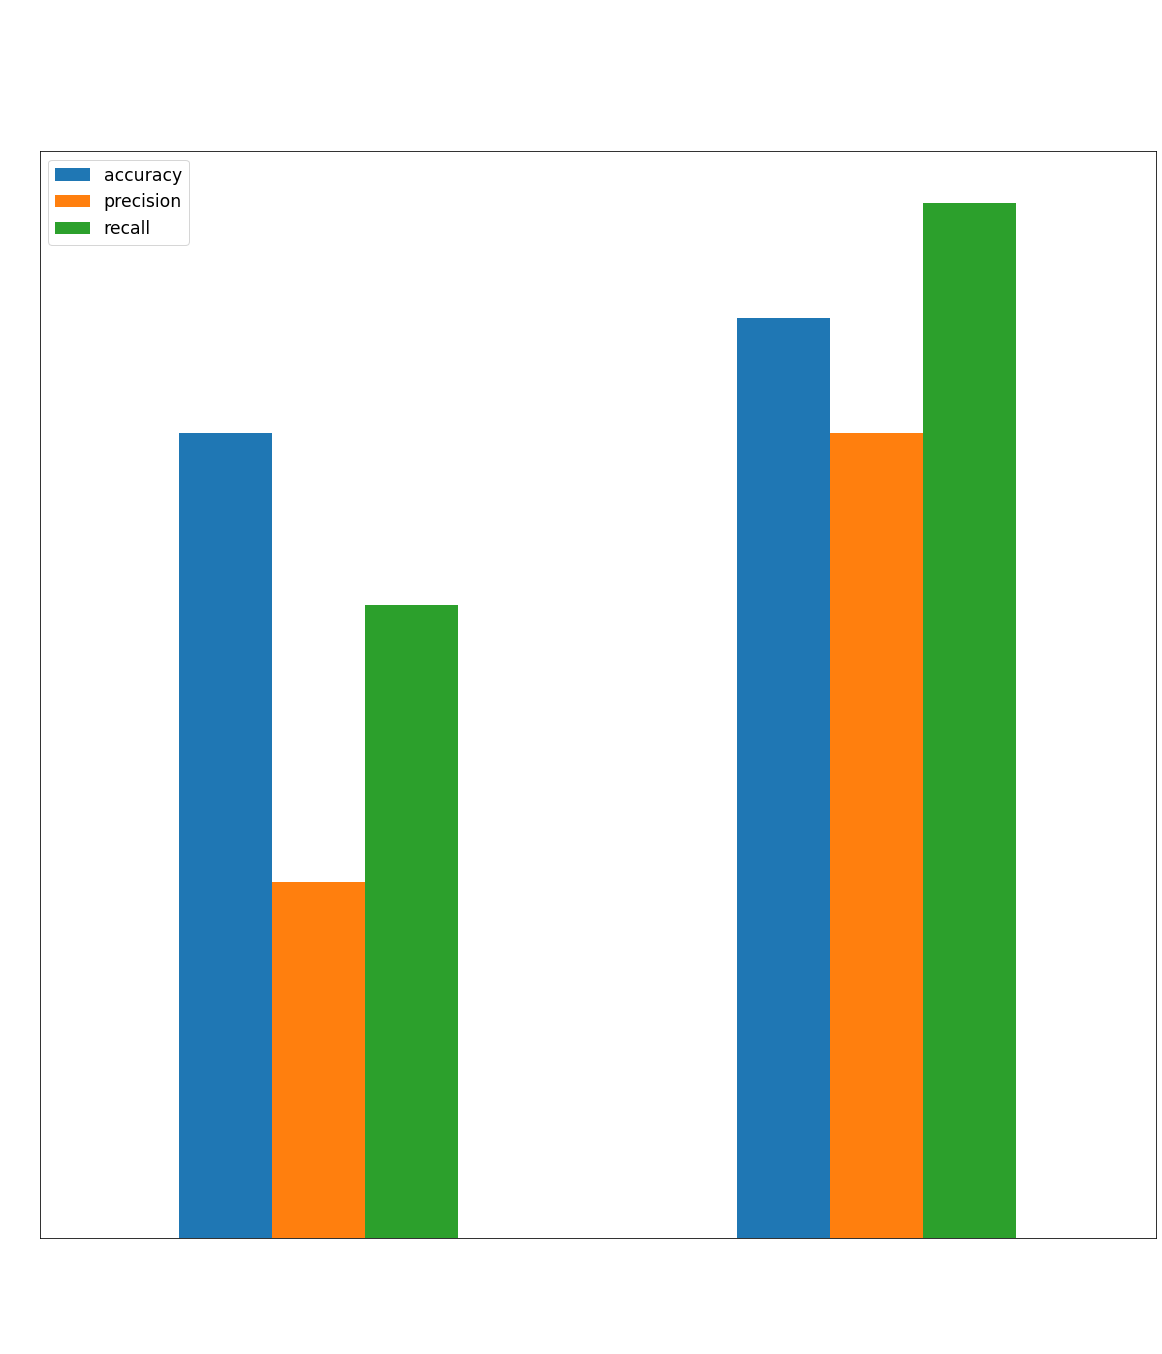

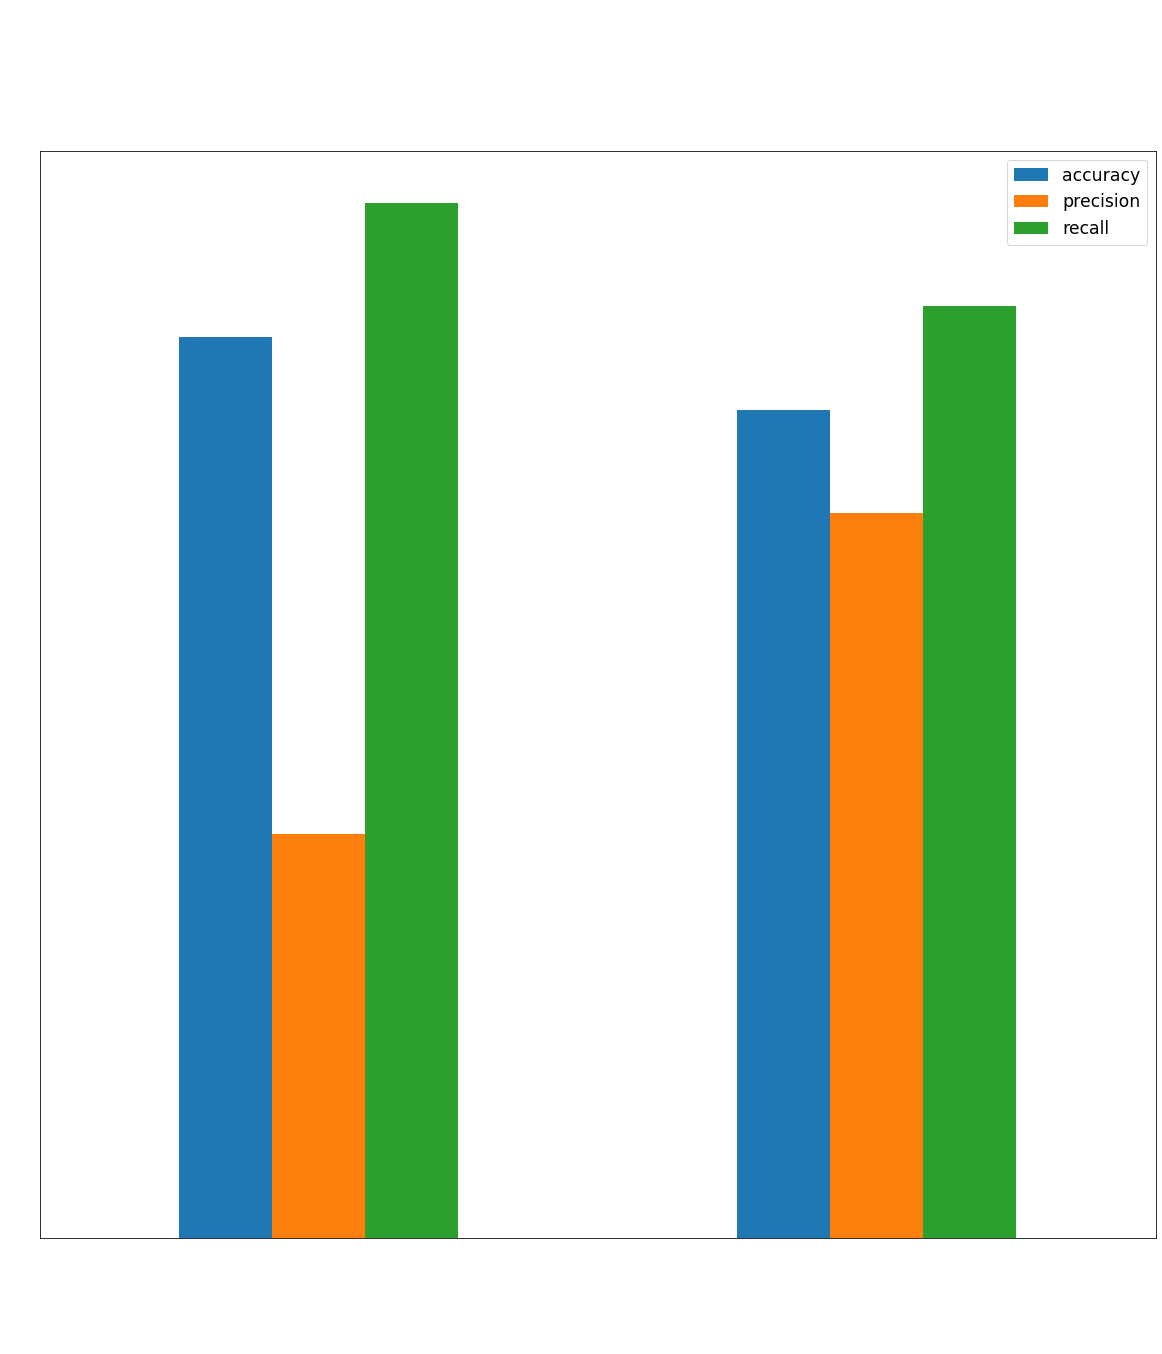

In [11]:
reordered_dictionary = reorder_dictionary(eval_dict)

for k_file, v_file in reordered_dictionary.items():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(20, 20)
    pd.DataFrame.from_dict(v_file).T.plot.bar(ax=ax)
    fig.suptitle(k_file, fontsize=50, color="white")
    plt.show()

print("\n\n\n")
